In [1]:
import sys, os.path as p; sys.path.insert(0, p.abspath('../'))

from tools.charting.plot_helpers import *
from tools.analysis.timeseries import *
from tools.loaders.binance import binance_client, update_binance_data, load_binance_data

Here you need to pass your API key and SECRET for getting data from Binance account

In [2]:
API_KEY = '7434a6c9df1932fd0d34538ad1b31f4345b6728385738899e9574a4d9b87c1b8'
SECRET_KEY = '690092658edae1bfb5ac94f655fb86065fb1f7e84ac67e42442f0ecfdcf299f8'
bc = binance_client(API_KEY, SECRET_KEY)

We will fetch data from binance and place them to the SQLite database (here daily bars are used for demo but you can use other timeframes: 1m, 5m, ....)

This method will upload recent actual data and put it to database if called later ! So you can tracking actual historical data.

In [6]:
timeframe = '1m' # you need to fetch 5M data and it will take some time

for s in ['BTCUSDT', 'XRPUSDT', 'ETHUSDT', 'EOSUSDT']:
    update_binance_data(bc, s, timeframe, path='../data')

 >> Loading BTCUSDT 1m for [2020-09-10 14:58:00  -> 12 Jan 2021 14:02:00]



 >> Loading XRPUSDT 1m for [2020-09-10 15:39:00  -> 12 Jan 2021 14:06:00]



 >> Loading ETHUSDT 1m for [2020-09-10 16:13:00  -> 12 Jan 2021 14:10:00]



 >> Loading EOSUSDT 1m for [2020-09-10 16:54:00  -> 12 Jan 2021 14:14:00]


For loading data we use <b>load_binance_data</b> function call

In [4]:
# loading all available data
btc = load_binance_data('BTCUSDT', '1d', path='../data')

# it's able to load not all data but some range
eos = load_binance_data('EOSUSDT', '1d', start='2020-04-01', end='2020-04-05', path='../data')
eos

,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av,ignore
time,,,,,,,,,,
2020-04-01,2.2090,2.2996,2.1324,2.2549,10421324.16,2.296033e+07,67292,5228892.75,1.152657e+07,0
2020-04-02,2.2550,2.4968,2.2475,2.2895,14720028.78,3.423910e+07,98426,7549731.17,1.755099e+07,0
2020-04-03,2.2900,2.3842,2.2672,2.3325,9487365.97,2.206971e+07,68950,4801671.18,1.116731e+07,0
2020-04-04,2.3332,2.4034,2.2836,2.3559,8091416.27,1.887390e+07,57167,4098835.26,9.564439e+06,0


Now we can plot OHLC bars and some indicators

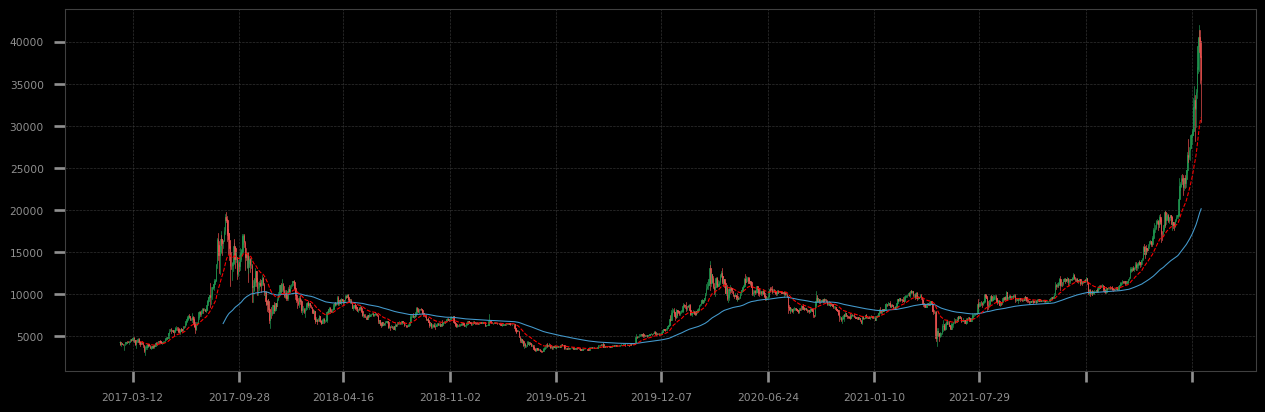

In [5]:
fig(16, 5)
ohlc_plot(btc)
plt.plot(apply_to_frame(ema, btc.close, 120));
plt.plot(apply_to_frame(ema, btc.close, 25), 'r--');

In [7]:
d1 = load_binance_data('BTCUSDT', '1m', path='../data')

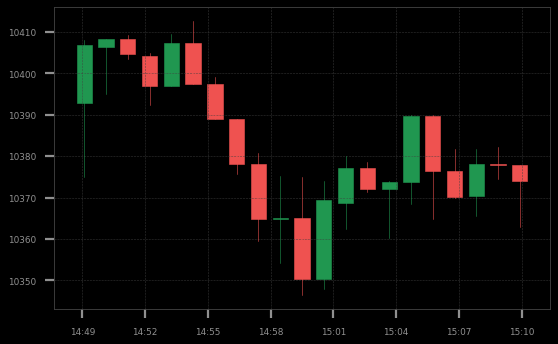

In [11]:
ohlc_plot(d1['2020-09-10 14:50':'2020-09-10 15:10'])